<a href="https://colab.research.google.com/github/KY-39/platform_udt3/blob/main/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC_%D0%9F%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B5_%D1%81%D0%BB%D0%BE%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Основы искусственных нейронных сетей. Обучение с учителем. Полносвязные слои, понятие выборок данных. - соревнование Kaggle

! Не забудьте создать копию ноутбука и в ней работать, чтобы она у Вас сохранилась с Вашими данными работы и обучения в ячейках: Файл - сохранить копию на Диске.


### Установка и загрузка необходимых модулей

In [ ]:
# установка свежего API Kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=76c136df546a36b01ac789d57f4e6c55c9f41ab58ebdafa4e91a8998d8671bdb
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


####! После установки свежего API Kaggle, рекомендуем перезапустить среду выполнения. Далее, последовательно выполнять ячейки. Иначе будут ошибки в ячейках.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from sklearn.model_selection import train_test_split

from google.colab import drive


#Домашнее задание

##**Задание 1.** 
Загрузите из датасета по ссылке ниже базу цифр MNIST, а также базу для тестирования. С помощью методов, изученных в занятиях по работе с таблицами Pandas, Анализ и обработка данных, и данном занятии, обработайте датасет и подайте в нейронную сеть, постаравшись добиться максимальной точности распознавания. Для улучшения обучения можно использовать также дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора Adam и прочие гиперпараметры. Результаты рекомендуется заносить в таблицу для себя, чтобы можно было потом воспроизвести лучший вариант. Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Следуйте коду в ноутбуке 
для создания ответа. Ответ можно улучшить и подавать результат несколько раз. 

Ссылка на соревнование (не забудьте вначале зарегистрироваться на Каггл и войти в аккаунт, тогда ссылка приведёт на соревнование):

https://www.kaggle.com/t/fe542b8b22b64e4c931094fb66423131

Таблица лидеров:

https://www.kaggle.com/c/udt3/leaderboard

Общемировое соревнование:

https://www.kaggle.com/c/digit-recognizer

Описание: Файлы данных этого датасета - train.csv и test.csv - содержат полутоновые изображения нарисованных от руки цифр от нуля до девяти.

Каждое изображение имеет 28 пикселей в высоту и 28 пикселей в ширину, всего 784 пикселя. Каждый пиксель имеет одно связанное с ним значение пикселя, указывающее яркость или темноту этого пикселя, причем более низкие числа означают более темный. Это значение пикселя представляет собой целое число от 0 до 255 включительно.

Набор обучающих данных (train.csv) содержит 785 столбцов. Первый столбец, называемый «метка» (label), - это цифра, нарисованная пользователем. Остальные столбцы содержат значения пикселей связанного изображения.

Каждый столбец пикселей в обучающем наборе имеет имя, например pixelx, где x - целое число от 0 до 783 включительно. Чтобы найти этот пиксель на изображении, предположим, что мы разложили x как x = i * 28 + j, где i и j - целые числа от 0 до 27 включительно. Тогда pixelx расположен в строке i и столбце j матрицы 28 x 28 (индексирование нулем).

Например, pixel31 указывает пиксель, который находится в четвертом столбце слева и во второй строке сверху, как на ascii-диаграмме ниже.

Визуально, если мы опускаем префикс «пиксель», пиксели составляют изображение следующим образом:

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 |   |   |   |  ...  |   |

728 729 730 731 ... 754 755

756 757 758 759 ... 782 783

Набор тестовых данных (test.csv) такой же, как обучающий набор, за исключением того, что он не содержит столбца «метка».

Ваш файл отправки должен быть в следующем формате: для каждого из 28000 изображений в тестовом наборе выведите одну строку, содержащую ImageId и прогнозируемую цифру. Например, если вы предсказываете, что первое изображение имеет 3, второе изображение - 7, а третье изображение - 8, то ваш файл отправки будет выглядеть так:

ImageId,Label

1,3

2,7

3,8
 
(ещё 27997 строк)

Метрика оценки для этого конкурса - точность категоризации или доля тестовых изображений, которые правильно классифицированы. Например, точность категоризации 0,97 означает, что вы правильно классифицировали все изображения, кроме 3%.

##Решение

#### Создаём правильную папку для ключа Каггл

In [ ]:
!mkdir /root/.kaggle # создаём папку ~/.kaggle для ключа kaggle в Колабе, она должна быть такой по требованию Каггл

In [ ]:
# переходим в папку, теперь это путь по умолчанию
%cd /root/.kaggle 

/root/.kaggle


In [ ]:
#запускаем - подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
#после запуска переходим по ссылке, которая появится, для идентификации
#копируем оттуда код authorization code и вставляем здесь в окошко
drive.mount('/content/drive')

Mounted at /content/drive


#### Устанавливаем ключ Каггл, чтобы участвовать в соревнованиях

Нужно зарегистрироваться на Каггл (https://www.kaggle.com/) и скачать ключ для взаимодействия с API соревновательной системы Каггла. После регистрации, справа появятся Ваши имя и фамилия - ссылка на персональную страницу. Нажмите на них. Когда страница загрузится, справа увидите Account. Нажимаете на надпись, затем прокручиваете страницу вниз, до вкладки API, там нажимаете Create New API Token. 
Ключ - это файл kaggle.json, который скачается после нажатия. Нужно скопировать его в папку Google Drive, предварительно её создав: My Drive/datasets/kaggle/ (из Колаба её адрес, который будем указывать для загрузки, такой: /content/drive/My Drive/datasets/kaggle/).

In [ ]:
# копируем ключ с Google Drive в созданную выше папку, предварительно её создав:
!cp '/content/drive/My Drive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json'

In [ ]:
!kaggle --version

Kaggle API 1.5.12


In [ ]:
!ls

kaggle.json


###Подключаемся к системе соревнований, скачиваем датасет

In [ ]:
!kaggle competitions download -c digit-recognizer # скачиваем датасет и тестовые данные

 78% 12.0M/15.3M [00:00<00:00, 123MB/s]
100% 15.3M/15.3M [00:00<00:00, 144MB/s]


In [ ]:
!ls

digit-recognizer.zip  kaggle.json


###Разархивируем датасет

In [ ]:
# разархивируем данные
import zipfile 
import io
z = zipfile.ZipFile('digit-recognizer.zip', 'r') #загрузили из архива, распаковали
z.extractall()
!ls

digit-recognizer.zip  kaggle.json  sample_submission.csv  test.csv  train.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Разделяем данные и метки

In [ ]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,:1]

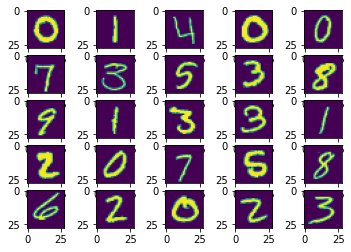

In [ ]:
plt.subplots(5,5)
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train.iloc[i,::].to_numpy().reshape(28,28))

In [ ]:
x_train ,x_test , y_train ,  y_test = train_test_split(x_train,y_train,test_size=0.3,random_state = 42)

In [ ]:
print("X train shape: ",x_train.shape)
print("Y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (29400, 784)
Y train shape:  (29400, 1)
X test shape:  (12600, 784)
Y test shape:  (12600, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # используем функцию нормализации
x_train = scaler.fit_transform(x_train) # сначала обучаем на тренировочных данных, потом трансформируем их
x_test = scaler.transform(x_test)

###Создаём сеть, компилируем, обучаем

In [ ]:
model = Sequential() # Создаём полносвязную сеть
model.add(Dense(80, input_shape=(784,), activation="relu")) # Добавляем полносвязный слой на 80 нейронов с relu-активацией, указываем входной размер 784, соответствующий размеру входных данных
model.add(Dense(40, activation="relu")) # Добавляем полносвязный слой на 40 нейронов с relu-активацией
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
919/919 [==============================] - 6s 6ms/step - loss: 0.3170 - accuracy: 0.9080
Epoch 2/15
919/919 [==============================] - 3s 3ms/step - loss: 0.1237 - accuracy: 0.9629
Epoch 3/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0784 - accuracy: 0.9758
Epoch 4/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0570 - accuracy: 0.9817
Epoch 5/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0474 - accuracy: 0.9849
Epoch 6/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 7/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0255 - accuracy: 0.9922
Epoch 8/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0211 - accuracy: 0.9937
Epoch 9/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0264 - accuracy: 0.9906
Epoch 10/15
919/919 [==============================] - 3s 3ms/step - loss: 0.0155 - accuracy: 0.9954

###Делаем предсказания моделью

In [ ]:
model.evaluate(x_test,y_test)

394/394 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.9590


[0.4098702669143677, 0.9590476155281067]

In [ ]:
y_pred = model.predict(test)
y = []
for i in range(0,len(y_pred)):
    prob = y.append(np.argmax(list(y_pred[i])))

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

###Переводим ответ в правильный формат, отсылаем для подсчёта рейтинга

In [ ]:
submission = pd.DataFrame({"ImageId":range(1,len(y_pred)+1),"Label":y})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submission = submission.to_csv('./submission.csv',index=False,header=True)#,encoding='utf-8'

In [ ]:
!ls

digit-recognizer.zip  sample_submission.csv  test.csv
kaggle.json	      submission.csv	     train.csv


In [ ]:
#!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Message" # для участия в общем соревновании

In [ ]:
!kaggle competitions submit -c udt3 -f submission.csv -m "Message" # для участия в соревновании группы

100% 208k/208k [00:01<00:00, 185kB/s]
Successfully submitted to Классификация цифр

###Переходим по ссылке, чтобы увидеть таблицу лидеров.

https://www.kaggle.com/c/udt3/leaderboard